<a href="https://colab.research.google.com/github/Yayadark/aerospace-ml-and-pytorch-internship/blob/main/Aerospace_Structural_Design_Dataset_Yahia_AlOmari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0) Downloading Dataset and Setup

This will download the csv dataset for you and unzip it

In [ ]:
!curl -L -o /content/aerospace-structural-design-dataset.zip https://www.kaggle.com/api/v1/datasets/download/ziya07/aerospace-structural-design-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 39205  100 39205    0     0  79734      0 --:--:-- --:--:-- --:--:-- 79734


In [ ]:
!unzip /content/aerospace-structural-design-dataset.zip

Archive:  /content/aerospace-structural-design-dataset.zip
  inflating: aerospace_structural_design_dataset.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.multioutput import MultiOutputClassifier
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
df = pd.read_csv("/content/aerospace_structural_design_dataset.csv")

In [ ]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
df.info()

Dataset Shape: (300, 22)

DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Material Type              300 non-null    object 
 1   E (GPa)                    300 non-null    float64
 2   ν                          300 non-null    float64
 3   ρ (kg/m³)                  300 non-null    float64
 4   Tensile Strength (MPa)     300 non-null    float64
 5   Young’s Modulus            300 non-null    float64
 6   Altitude (m)               300 non-null    float64
 7   Temperature (°C)           300 non-null    float64
 8   Pressure (Pa)              300 non-null    float64
 9   Operational Life (years)   300 non-null    int64  
 10  Wing Span (m)              300 non-null    float64
 11  Fuselage Length (m)        300 non-null    float64
 12  Structural Thickness (mm)  300 non-null    float64
 13  Structu

## Task 1: Basic Data Exploration
Complete the following code to explore the dataset structure:

In [ ]:
# TODO: Display the first 5 rows of the dataset
print("First 5 rows:")
# YOUR CODE HERE
print(df[0:5])

print("\nLast 5 rows:")
# TODO: Display the last 5 rows of the dataset
# YOUR CODE HERE
print(df[-5:])

print("\nDataset Statistics:")
# TODO: Display descriptive statistics for numerical columns
# YOUR CODE HERE
print(df.describe())

print("\nMissing Values:")
# TODO: Check for missing values in each column
# YOUR CODE HERE
print(df.isnull().sum())

# Define target variables
target_variables = ['Vibration Damping', 'Computational Time', 'Weight Efficiency', 'Durability']

First 5 rows:
  Material Type     E (GPa)         ν    ρ (kg/m³)  Tensile Strength (MPa)  \
0      Aluminum  185.696746  0.307709  2730.710453             1423.889663   
1      Titanium   59.852396  0.309107  1969.670105              467.442225   
2  Carbon Fiber  136.373918  0.346932  3659.139119              961.163423   
3      Aluminum  103.140469  0.311080  3377.904155             1432.133210   
4      Aluminum  136.732380  0.308174  1859.527807             1448.294059   

   Young’s Modulus  Altitude (m)  Temperature (°C)  Pressure (Pa)  \
0        91.172993  15599.655148        -57.431675  148360.107451   
1        88.161860  12086.883847        -40.726022  168254.942831   
2        55.899166  19366.243868        -43.576330  161654.152333   
3        53.718123  15975.653098        -54.264450  143375.998175   
4        86.937769   6948.716440        -41.038790  100397.403520   

   Operational Life (years)  ...  Structural Thickness (mm)  Structural Shape  \
0                    

In [ ]:
# Create a copy of the dataset for preprocessing
df_processed = df.copy()

# Identify categorical columns (excluding target variables)
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
categorical_features = [col for col in categorical_cols if col not in target_variables]

print("Categorical Features:", categorical_features)
print("Target Variables:", target_variables)

Categorical Features: ['Material Type', 'Structural Shape', 'Load Distribution', 'Quantum Algorithm Type']
Target Variables: ['Vibration Damping', 'Computational Time', 'Weight Efficiency', 'Durability']


In [ ]:
# TODO: Initialize label encoders for categorical features
label_encoders = {}

# TODO: Apply label encoding to categorical features
for col in categorical_features:
    # YOUR CODE HERE - Create and fit label encoder
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    # Save the encoder in label_encoders dictionary
    pass

# TODO: Apply label encoding to target variables
target_encoders = {}
for col in target_variables:
    # YOUR CODE HERE - Create and fit label encoder for targets
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    target_encoders[col] = le
    pass

print("Label encoding completed!")
print("Processed dataset shape:", df_processed.shape)

Label encoding completed!
Processed dataset shape: (300, 22)


In [ ]:
# Separate features and targets
X = df_processed.drop(columns=target_variables)
y = df_processed[target_variables]

print("Features shape:", X.shape)
print("Targets shape:", y.shape)
print("\nFeature columns:")
print(X.columns.tolist())


Features shape: (300, 18)
Targets shape: (300, 4)

Feature columns:
['Material Type', 'E (GPa)', 'ν', 'ρ (kg/m³)', 'Tensile Strength (MPa)', 'Young’s Modulus', 'Altitude (m)', 'Temperature (°C)', 'Pressure (Pa)', 'Operational Life (years)', 'Wing Span (m)', 'Fuselage Length (m)', 'Structural Thickness (mm)', 'Structural Shape', 'Load Distribution', 'Quantum Algorithm Type', 'Number of Iterations', 'Optimization Time (sec)']


In [ ]:
# TODO: Split the data into training and testing sets (80-20 split, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# YOUR CODE HERE

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# TODO: Initialize and fit StandardScaler on training data
scaler = StandardScaler()
# YOUR CODE HERE
# YOUR CODE HERE - Fit the scaler
scaler.fit(X_train)

# TODO: Transform both training and test sets
X_train_scaled = scaler.transform(X_train)
# YOUR CODE HERE
X_test_scaled = scaler.transform(X_test)
# YOUR CODE HERE

print("Feature scaling completed!")



Training set size: 240 samples
Test set size: 60 samples
Feature scaling completed!


In [ ]:
# Define models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

## Task 6: Single Target Training
Train models for the 'Weight Efficiency' target:

In [ ]:
# Focus on Weight Efficiency target first
target_name = 'Weight Efficiency'
y_target_train = y_train[target_name]
y_target_test = y_test[target_name]

results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name} for {target_name}...")

    # TODO: Train the model
    reg = model.fit(X_train_scaled, y_target_train)
    # YOUR CODE HERE

    # TODO: Make predictions on test set
    y_pred = reg.predict(X_test_scaled)
    # YOUR CODE HERE

    # TODO: Calculate accuracy
    accuracy = accuracy_score(y_target_test, y_pred)
    # YOUR CODE HERE

    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'predictions': y_pred,
        'model': model
    }

    print(f"{model_name} Accuracy: {accuracy:.4f}")

# TODO: Find and print the best performing model
best_model_name = max(results, key=lambda name: results[name]['accuracy'])
# YOUR CODE HERE
print(f"\nBest Model for {target_name}: {best_model_name}")


Training Logistic Regression for Weight Efficiency...
Logistic Regression Accuracy: 0.3333

Training Random Forest for Weight Efficiency...
Random Forest Accuracy: 0.3167

Training Decision Tree for Weight Efficiency...
Decision Tree Accuracy: 0.3000

Training SVM for Weight Efficiency...
SVM Accuracy: 0.3667

Best Model for Weight Efficiency: SVM


## Task 7: Detailed Evaluation
Provide detailed evaluation for the best model:

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.22      0.29        23
           1       0.32      0.41      0.36        22
           2       0.38      0.53      0.44        15

    accuracy                           0.37        60
   macro avg       0.39      0.39      0.37        60
weighted avg       0.39      0.37      0.36        60


Confusion Matrix:
[[ 5 13  5]
 [ 5  9  8]
 [ 1  6  8]]


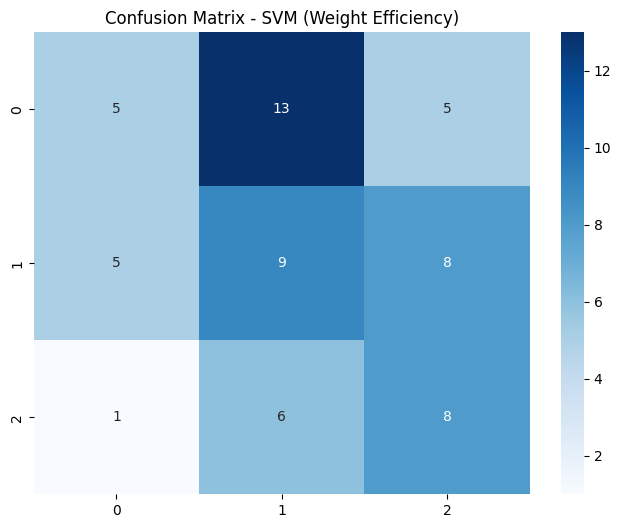

In [ ]:
# Get the best model and its predictions
best_model_name = max(results, key=lambda name: results[name]['accuracy'])
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

# TODO: Print detailed classification report
print("Classification Report:")
from sklearn.metrics import classification_report
print(classification_report(y_target_test, best_predictions))
# YOUR CODE HERE

print("\nConfusion Matrix:")
# TODO: Create and display confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_target_test, best_predictions)
# YOUR CODE HERE
print(cm)

# TODO: Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# YOUR CODE HERE - Use seaborn heatmap
plt.title(f'Confusion Matrix - {best_model_name} ({target_name})')
plt.show()

## Multi-Output Model Training

In [ ]:
# Train multi-output models for all targets simultaneously
print("Training Multi-Output Models...")
print("="*40)

multi_results = {}

for model_name, model in models.items():
    if model_name in ['SVM', 'Logistic Regression']:
        # SVM needs special handling for multi-output
        multi_model = MultiOutputClassifier(model)
    else:
        multi_model = model

    print(f"Training {model_name}...")
    multi_model.fit(X_train_scaled, y_train)

    # Predict on test set
    y_pred_multi = multi_model.predict(X_test_scaled)

    # Calculate accuracy for each target
    target_accuracies = {}
    for i, target in enumerate(target_variables):
        if len(y_pred_multi.shape) == 1:  # Single target case
            acc = accuracy_score(y_test.iloc[:, i], y_pred_multi)
        else:  # Multi-target case
            acc = accuracy_score(y_test.iloc[:, i], y_pred_multi[:, i])
        target_accuracies[target] = acc

    multi_results[model_name] = target_accuracies

    # Print results
    avg_accuracy = np.mean(list(target_accuracies.values()))
    print(f"Average Accuracy: {avg_accuracy:.4f}")
    print()

# Display results summary
results_df = pd.DataFrame(multi_results).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Melt into long format for seaborn
results_long = results_df.melt(id_vars="Model", var_name="Target", value_name="Accuracy")

print("Multi-Output Model Performance Summary:")
print(results_df.round(4))

Training Multi-Output Models...
Training Logistic Regression...
Average Accuracy: 0.3208

Training Random Forest...
Average Accuracy: 0.3542

Training Decision Tree...
Average Accuracy: 0.3375

Training SVM...
Average Accuracy: 0.3042

Multi-Output Model Performance Summary:
                 Model  Vibration Damping  Computational Time  \
0  Logistic Regression             0.4000              0.2667   
1        Random Forest             0.4667              0.4167   
2        Decision Tree             0.3833              0.3667   
3                  SVM             0.3000              0.3000   

   Weight Efficiency  Durability  
0             0.3333      0.2833  
1             0.3167      0.2167  
2             0.2833      0.3167  
3             0.3667      0.2500  


## Task 8: Results Visualization and Analysis
Create visualizations for model comparison:

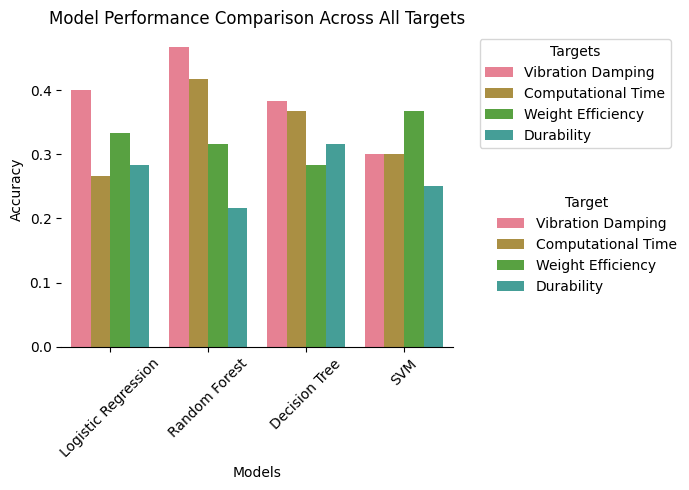

Best Overall Model: Random Forest
Average Accuracy: 0.3542


In [35]:
# TODO: Create a bar plot comparing model performance across all targets
figsize=(14, 8)
# YOUR CODE HERE - Create grouped bar plot
g = sns.catplot(data=results_long, kind = "bar", x="Model", y="Accuracy", hue="Target", ax=ax)
g.despine(left=True)
plt.title('Model Performance Comparison Across All Targets')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(title='Targets', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# TODO: Find and print the best performing model overall
overall_performance = {model: np.mean(list(acc.values())) for model, acc in multi_results.items()}
best_overall_model = max(overall_performance, key=overall_performance.get)
print(f"Best Overall Model: {best_overall_model}")
print(f"Average Accuracy: {overall_performance[best_overall_model]:.4f}")

## 5) Feature Importance Analysis


## Task 9: Feature Importance

Analyze feature importance using Random Forest:

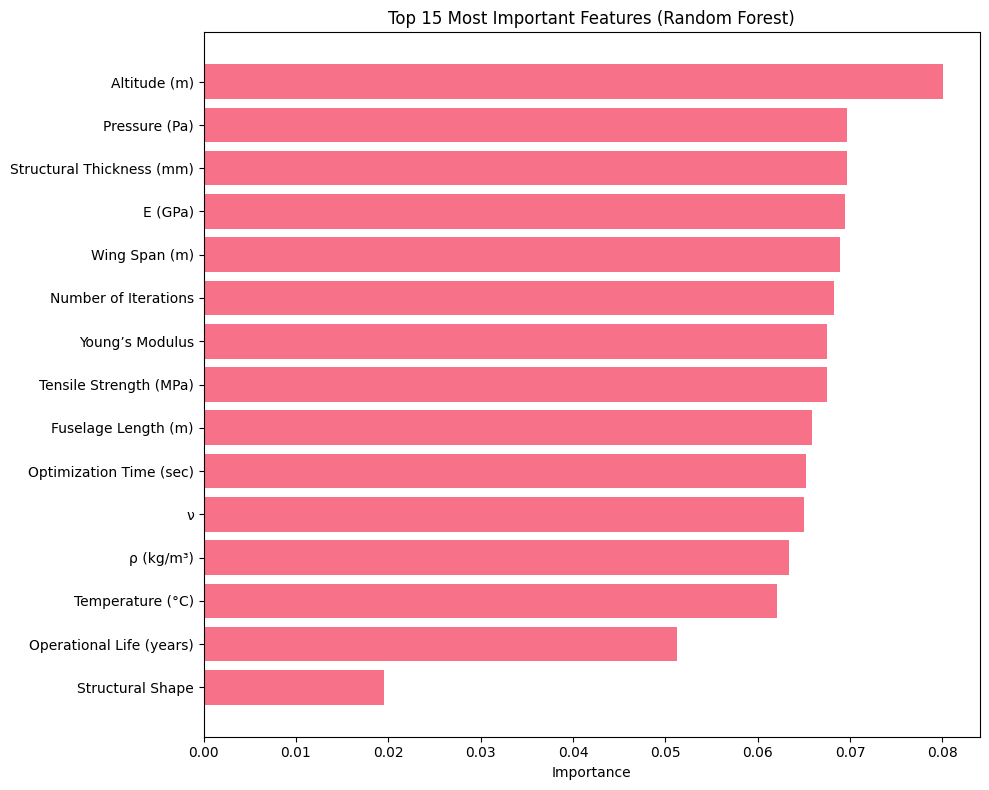

In [36]:
from sklearn.multioutput import MultiOutputClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Train Random Forest (multi-output)
rf_base = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model = MultiOutputClassifier(rf_base)
rf_model.fit(X_train_scaled, y_train)

# Step 2: Extract feature importances (average across outputs)
# Each estimator (one per target) has its own .feature_importances_
importances = np.mean([est.feature_importances_ for est in rf_model.estimators_], axis=0)

# Step 3: Put into DataFrame for easy handling
feature_names = X_train.columns if hasattr(X_train, "columns") else [f"f{i}" for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Step 4: Select Top 15 features
top_features = importance_df.sort_values(by="Importance", ascending=False).head(15)

# Step 5: Plot horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_features["Feature"], top_features["Importance"])
plt.gca().invert_yaxis()  # highest at top
plt.title("Top 15 Most Important Features (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


# 6) Model Optimization (Bonus Section)

## Task 10: Hyperparameter Tuning

Optimize the best performing model:

## 7) Deep Learning with PyTorch

Introduction to Neural Networks for Multi-Output Classification

Now we'll implement a custom neural network using PyTorch to handle our multi-output classification problem. This approach can potentially capture complex non-linear relationships that traditional ML models might miss.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder
import numpy as np
from collections import Counter

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


*if device is CPU, you can change to GPU from runtime setings on top, but be careful it will restart the session*

## Dataset Class

## Task 11: Dataset Class

Fill in the missing code where indicated to load the dataset.

In [ ]:
class AerospaceDataset(Dataset):
    """Custom Dataset class for aerospace structural design data"""

    def __init__(self, X, y, transform=None):
        """
        Initialize the dataset

        Args:
            X: Features (numpy array or pandas DataFrame)
            y: Targets (numpy array or pandas DataFrame)
            transform: Optional transform to be applied
        """
        # TODO: Convert inputs to torch tensors with appropriate data types
        self.X = torch.from_numpy(X.values if hasattr(X, "values") else X).float()
        self.y = torch.from_numpy(y.values if hasattr(y, "values") else y).long()
        self.transform = transform

    def __len__(self):
        # TODO: Return the length of the dataset
         return len(self.X)
         # YOUR CODE HERE

    def __getitem__(self, idx):
        # TODO: Return the sample at given index
        if torch.is_tensor(idx):
            idx = idx.tolist()

        sample_x = self.X[idx]
        sample_y = self.y[idx]

        if self.transform:
            sample_x = self.transform(sample_x)

        return sample_x, sample_y

## Task 12: Prepare Data for PyTorch
Convert our preprocessed data for PyTorch:

In [ ]:
# First, we need to prepare our target variables for multi-class classification
# Convert categorical targets to numerical if not already done

# TODO: Ensure all target variables are numerically encoded
y_encoded = y_train.copy()
y_test_encoded = y_test.copy()

# Get number of classes for each target
n_classes = {}
for col in target_variables:
    # TODO: Count unique classes for each target variable
    n_classes[col] = y_encoded[col].nunique()
    print(f"{col}: {n_classes[col]} classes")

# TODO: Convert y_train and y_test to numpy arrays
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

print(f"Training targets shape: {y_train_array.shape}")
print(f"Test targets shape: {y_test_array.shape}")

# TODO: Create Dataset instances
train_dataset =  AerospaceDataset(X_train_scaled, y_encoded)
test_dataset = AerospaceDataset(X_test_scaled, y_test_encoded)

# TODO: Create DataLoaders
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")

Vibration Damping: 3 classes
Computational Time: 3 classes
Weight Efficiency: 3 classes
Durability: 3 classes
Training targets shape: (240, 4)
Test targets shape: (60, 4)
Number of training batches: 8
Number of test batches: 2


## Neural Network Architecture

## Task 13: Building a Network

Complete the class below to create the network architecture for training

In [ ]:
class AerospaceNet(nn.Module):
    """
    Multi-output neural network for aerospace structural design prediction
    """

    def __init__(self, input_size, hidden_sizes, output_sizes):
        """
        Initialize the neural network

        Args:
            input_size: Number of input features
            hidden_sizes: List of hidden layer sizes
            output_sizes: Dictionary with target names and their number of classes
            dropout_rate: Dropout probability for regularization
        """
        super(AerospaceNet, self).__init__()

        self.target_variables = list(output_sizes.keys())

        # TODO: Define shared hidden layers
        layers = []
        prev_size = input_size

        for hidden_size in hidden_sizes:
            # YOUR CODE HERE - Add Linear layer, BatchNorm, ReLU, and Dropout
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.ReLU())
            #layers.append(nn.Dropout(p=dropout_rate))
            prev_size = hidden_size

        self.shared_layers = nn.Sequential(*layers)

        # TODO: Define output heads for each target variable
        self.output_heads = nn.ModuleDict()
        for target, n_classes in output_sizes.items():
            # YOUR CODE HERE - Create output layer for each target
            self.output_heads[target] = nn.Linear(prev_size, n_classes)

    def forward(self, x):
        """
        Forward pass through the network

        Args:
            x: Input tensor

        Returns:
            Dictionary with predictions for each target
        """
        # TODO: Pass input through shared layers
        shared_output = self.shared_layers(x)

        # TODO: Generate predictions for each target
        predictions = {}
        for target in self.target_variables:
            # YOUR CODE HERE - Get prediction for this target
         predictions[target] = self.output_heads[target](shared_output)

        return predictions

## Task 14: Model Initialization and Training Setup
Initialize the model and training components:


In [ ]:
# TODO: Define network architecture parameters
input_size = X_train_scaled.shape[1]
hidden_sizes = [128, 64, 32] # You can experiment with different architectures
output_sizes = n_classes

# TODO: Initialize the model
model = AerospaceNet(input_size, hidden_sizes, output_sizes)
model = model.to(device)

print(f"Model architecture:")
print(model)

# TODO: Count total parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# TODO: Define loss functions for each target (use CrossEntropyLoss)
criterion =  nn.CrossEntropyLoss()

# TODO: Define optimizer (Adam is recommended)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.005)

# TODO: Define learning rate scheduler (optional)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

Model architecture:
AerospaceNet(
  (shared_layers): Sequential(
    (0): Linear(in_features=18, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
  )
  (output_heads): ModuleDict(
    (Vibration Damping): Linear(in_features=32, out_features=3, bias=True)
    (Computational Time): Linear(in_features=32, out_features=3, bias=True)
    (Weight Efficiency): Linear(in_features=32, out_features=3, bias=True)
    (Durability): Linear(in_features=32, out_features=3, bias=True)
  )
)

Total parameters: 13,612
Trainable parameters: 13,612


## Task 15: Training and Evaluation Functions
Complete the function below

In [ ]:
def train_epoch(model, train_loader, criterion, optimizer, device):
    """
    Train the model for one epoch

    Returns:
        Average loss for the epoch
    """
    model.train()
    total_loss = 0.0
    num_batches = 0

    for batch_x, batch_y in train_loader:
        # TODO: Move data to device
        batch_x = batch_x.to(device).float()
        batch_y = batch_y.to(device).long()

        # TODO: Zero gradients
        optimizer.zero_grad()

        # TODO: Forward pass
        predictions = model(batch_x)

        # TODO: Calculate loss for each target
        loss = 0
        for i, target in enumerate(target_variables):
            target_loss = criterion(predictions[target], batch_y[:, i])
            loss += target_loss

        # TODO: Backward pass
        loss.backward()

        # TODO: Update weights
        optimizer.step()

        total_loss += loss.item()
        num_batches += 1

    return total_loss / num_batches

def evaluate_model(model, test_loader, criterion, device):
    """
    Evaluate the model on test data

    Returns:
        Dictionary with average loss and accuracies for each target
    """
    model.eval()
    total_loss = 0.0
    correct_predictions = {target: 0 for target in target_variables}
    total_samples = 0

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            # TODO: Move data to device
            batch_x = batch_x.to(device).float()
            batch_y = batch_y.to(device).long()

            # TODO: Forward pass
            predictions = model(batch_x)

            # TODO: Calculate loss
            loss = 0
            for i, target in enumerate(target_variables):
                target_loss = criterion(predictions[target], batch_y[:, i])
                loss += target_loss

                # TODO: Calculate accuracy for this target
                _, predicted = torch.max(predictions[target], 1)
                correct_predictions[target] += (predicted == batch_y[:, i]).sum().item()

            total_loss += loss.item()
            total_samples += batch_x.size(0)

    # Calculate accuracies
    accuracies = {target: correct / total_samples for target, correct in correct_predictions.items()}
    avg_loss = total_loss / len(test_loader)

    return avg_loss, accuracies

## Task 16: Training Loop Implementation
Implement the complete training loop:

In [ ]:
# Training parameters
num_epochs = 1000
best_accuracy = 0.0
patience = 10
patience_counter = 0

# Lists to store training history
train_losses = []
val_losses = []
val_accuracies = {target: [] for target in target_variables}

print("Starting training...")
print("="*50)

for epoch in range(num_epochs):
    # TODO: Train for one epoch
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)

    # TODO: Evaluate on test set
    val_loss, accuracies = evaluate_model(model, test_loader, criterion, device)

    # Store history
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    for target in target_variables:
        val_accuracies[target].append(accuracies[target])

    # TODO: Update learning rate scheduler
    if scheduler:
        scheduler.step(val_loss)
    # Calculate average accuracy for early stopping
    avg_accuracy = np.mean(list(accuracies.values()))

    # Print progress
    if (epoch + 1) % 100 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        print(f"Accuracies: {accuracies}")
        print(f"Average Accuracy: {avg_accuracy:.4f}")
        print("-" * 30)

    # TODO: Implement early stopping
    if avg_accuracy > best_accuracy:
        # YOUR CODE HERE - Update best accuracy and save model
        best_accuracy = avg_accuracy
        patience_counter = 0
        # Save best model
        torch.save(model.state_dict(), 'best_aerospace_model.pth')
    else:
        # YOUR CODE HERE - Increment patience counter
        patience_counter += 1


print(f"\nTraining completed!")
print(f"Best average accuracy: {best_accuracy:.4f}")

Starting training...
Epoch [1/1000]
Train Loss: 4.5662, Val Loss: 4.3736
Accuracies: {'Vibration Damping': 0.35, 'Computational Time': 0.43333333333333335, 'Weight Efficiency': 0.3333333333333333, 'Durability': 0.38333333333333336}
Average Accuracy: 0.3750
------------------------------
Epoch [100/1000]
Train Loss: 0.1819, Val Loss: 11.1535
Accuracies: {'Vibration Damping': 0.3333333333333333, 'Computational Time': 0.3, 'Weight Efficiency': 0.38333333333333336, 'Durability': 0.23333333333333334}
Average Accuracy: 0.3125
------------------------------
Epoch [200/1000]
Train Loss: 0.0721, Val Loss: 12.7211
Accuracies: {'Vibration Damping': 0.35, 'Computational Time': 0.36666666666666664, 'Weight Efficiency': 0.35, 'Durability': 0.23333333333333334}
Average Accuracy: 0.3250
------------------------------
Epoch [300/1000]
Train Loss: 0.0588, Val Loss: 13.0833
Accuracies: {'Vibration Damping': 0.36666666666666664, 'Computational Time': 0.3333333333333333, 'Weight Efficiency': 0.383333333333

## Task 17: Training Visualization and Analysis
Create visualizations for training progress:

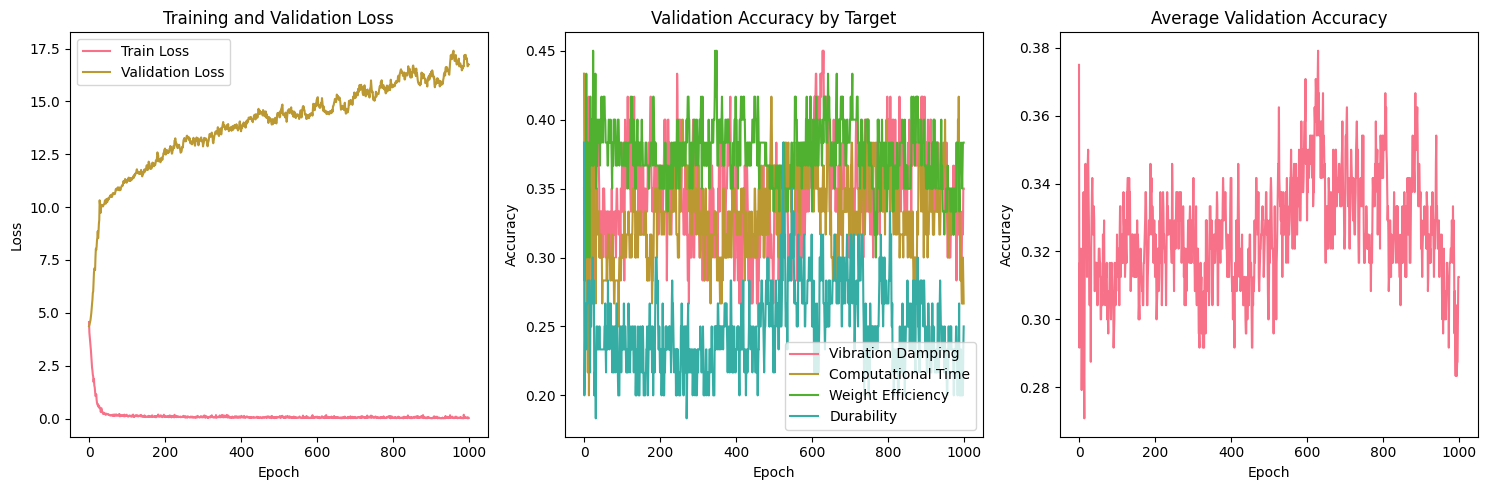

PYTORCH MODEL FINAL PERFORMANCE
Vibration Damping: 0.4333
Computational Time: 0.3667
Weight Efficiency: 0.4000
Durability: 0.3167
Average Accuracy: 0.3792


In [ ]:
# TODO: Plot training and validation losses
plt.figure(figsize=(15, 5))

# Loss plot
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# TODO: Plot individual target accuracies
plt.subplot(1, 3, 2)
for target in target_variables:
    plt.plot(val_accuracies[target], label=target)
    pass
plt.title('Validation Accuracy by Target')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# TODO: Plot average accuracy
plt.subplot(1, 3, 3)
avg_acc_history = [np.mean([accs[ep] for accs in val_accuracies.values()])
                   for ep in range(len(val_losses))]
plt.plot(avg_acc_history, label='Average Accuracy')
plt.title('Average Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# TODO: Print final performance summary
print("PYTORCH MODEL FINAL PERFORMANCE")
print("="*40)
# Load best model
model.load_state_dict(torch.load('best_aerospace_model.pth'))
final_loss, final_accuracies = evaluate_model(model, test_loader, criterion, device)

for target, accuracy in final_accuracies.items():
    print(f"{target}: {accuracy:.4f}")
print(f"Average Accuracy: {np.mean(list(final_accuracies.values())):.4f}")